In [9]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


iris = load_iris()
irisDF = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [11]:
irisDF['target'] = iris.target

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

X = irisDF.iloc[:,:-1]
y = irisDF.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average = None)
recall = recall_score(y_test, pred,average = None)
confusion = confusion_matrix(y_test, pred)
print(accuracy)
print(precision)
print(recall)
print(confusion)


0.9777777777777777
[1.         1.         0.92857143]
[1.         0.93333333 1.        ]
[[17  0  0]
 [ 0 14  1]
 [ 0  0 13]]


In [25]:
tree.feature_importances_

important_df = pd.DataFrame({'feature':X_train.columns,
             'importance':tree.feature_importances_})

<AxesSubplot:xlabel='feature', ylabel='importance'>

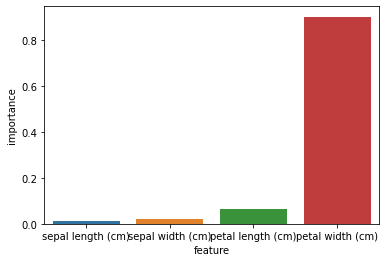

In [28]:
import seaborn as sns

sns.barplot(data = important_df, x = 'feature', y = 'importance')

In [33]:
important_df.sort_values(by = 'importance',ascending = False, inplace = True)

<AxesSubplot:xlabel='importance', ylabel='feature'>

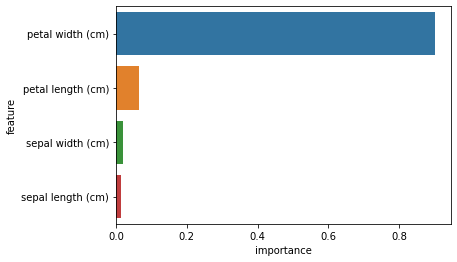

In [37]:
sns.barplot(data = important_df, y = 'feature', x = 'importance')

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

clf_GBM = GradientBoostingClassifier()
clf_GBM.fit(X_train, y_train)
pred = clf_GBM.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.9777777777777777
[[17  0  0]
 [ 0 14  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



<AxesSubplot:>

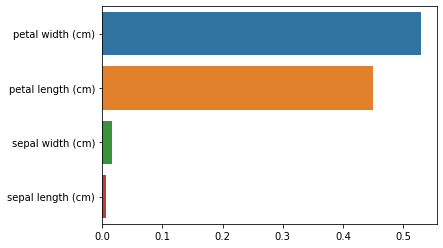

In [59]:
gbm_importances = clf_GBM.feature_importances_
gbm_importances

series = pd.Series(data = gbm_importances, index = X_train.columns)
series.sort_values(ascending = False, inplace = True)
sns.barplot(x = series, y = series.index)